<a href="https://colab.research.google.com/github/Jushef/Time-Series/blob/main/Facebook%20Prophet/Series_Temporales_F_P.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Facebook Prophet**
## **Load Libraries**

In [39]:
import pandas as pd
from fbprophet import Prophet

## **Load Data**

In [40]:
raw = 'https://raw.githubusercontent.com/ecabestadistica/curso-series-temporales/master/12.%20Prediciendo%20el%20futuro/Python/BeerWineLiquor.csv'
df = pd.read_csv(raw)

In [41]:
df.head()

,date,beer
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


##**Format the Data**

In [42]:
df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])
df.head()

,ds,y
0,1992-01-01,1509
1,1992-02-01,1541
2,1992-03-01,1597
3,1992-04-01,1675
4,1992-05-01,1822


##**Create and Fit Model**

In [43]:
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##**Pronósticos del futuro**

In [44]:
future = m.make_future_dataframe(periods=48, freq = 'MS')

In [45]:
future.head()

,ds
0,1992-01-01
1,1992-02-01
2,1992-03-01
3,1992-04-01
4,1992-05-01


In [46]:
df.head()

,ds,y
0,1992-01-01,1509
1,1992-02-01,1541
2,1992-03-01,1597
3,1992-04-01,1675
4,1992-05-01,1822


In [47]:
print(df.tail())
print(future.tail())

            ds     y
319 2018-08-01  4898
320 2018-09-01  4598
321 2018-10-01  4737
322 2018-11-01  5130
323 2018-12-01  6370
            ds
367 2022-08-01
368 2022-09-01
369 2022-10-01
370 2022-11-01
371 2022-12-01


In [48]:
forecast = m.predict(future)

In [49]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-01-01,1774.512619,1164.345040,1477.028142,1774.512619,1774.512619,-461.755050,-461.755050,-461.755050,-461.755050,-461.755050,-461.755050,0.0,0.0,0.0,1312.757569
1,1992-02-01,1777.322689,1178.442622,1513.540875,1777.322689,1777.322689,-427.146658,-427.146658,-427.146658,-427.146658,-427.146658,-427.146658,0.0,0.0,0.0,1350.176031
2,1992-03-01,1779.951464,1443.594333,1761.323731,1779.951464,1779.951464,-178.912314,-178.912314,-178.912314,-178.912314,-178.912314,-178.912314,0.0,0.0,0.0,1601.039150
3,1992-04-01,1782.761533,1417.540844,1748.672970,1782.761533,1782.761533,-196.056786,-196.056786,-196.056786,-196.056786,-196.056786,-196.056786,0.0,0.0,0.0,1586.704747
4,1992-05-01,1785.480956,1668.263846,2004.059948,1785.480956,1785.480956,45.197326,45.197326,45.197326,45.197326,45.197326,45.197326,0.0,0.0,0.0,1830.678281


In [50]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
367,2022-08-01,5578.963724,5452.754618,5788.589497,5537.636218,5627.552322,37.972762,37.972762,37.972762,37.972762,37.972762,37.972762,0.0,0.0,0.0,5616.936487
368,2022-09-01,5595.027495,5292.101979,5644.600561,5551.489570,5645.209381,-123.894304,-123.894304,-123.894304,-123.894304,-123.894304,-123.894304,0.0,0.0,0.0,5471.133191
369,2022-10-01,5610.573079,5385.723975,5730.101106,5565.385640,5662.233529,-49.814676,-49.814676,-49.814676,-49.814676,-49.814676,-49.814676,0.0,0.0,0.0,5560.758403
370,2022-11-01,5626.636849,5503.231564,5839.685808,5580.238627,5680.274257,46.942206,46.942206,46.942206,46.942206,46.942206,46.942206,0.0,0.0,0.0,5673.579055
371,2022-12-01,5642.182433,6574.796200,6926.858626,5594.408562,5698.490781,1104.175796,1104.175796,1104.175796,1104.175796,1104.175796,1104.175796,0.0,0.0,0.0,6746.358229


In [51]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [52]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
360,2022-01-01,5017.749456,4863.788327,5175.776496
361,2022-02-01,5016.138007,4856.926723,5190.801359
362,2022-03-01,5292.376630,5122.690966,5465.604420
363,2022-04-01,5306.801563,5140.445561,5480.555379
364,2022-05-01,5573.299030,5413.391567,5736.080974
365,2022-06-01,5559.964885,5401.010359,5725.236310
366,2022-07-01,5701.738176,5520.070389,5872.916652
367,2022-08-01,5616.936487,5452.754618,5788.589497
368,2022-09-01,5471.133191,5292.101979,5644.600561
369,2022-10-01,5560.758403,5385.723975,5730.101106


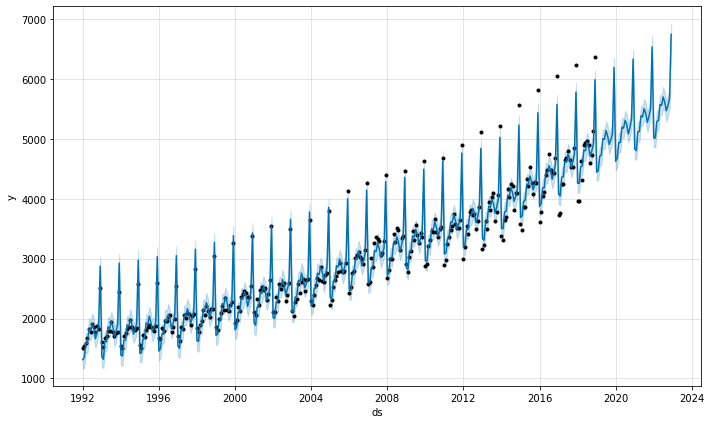

In [53]:
m.plot(forecast);

In [54]:
pd.plotting.register_matplotlib_converters()

(735234.0, 738521.0)

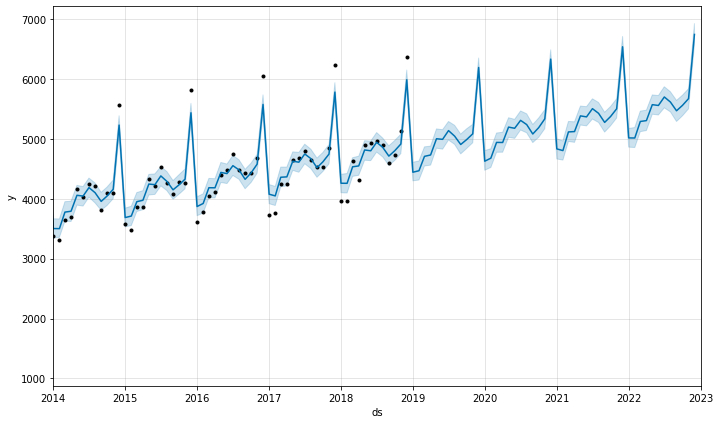

In [55]:
import matplotlib.pyplot as plt

m.plot(forecast)
plt.xlim('2014-01-01','2023-01-01')

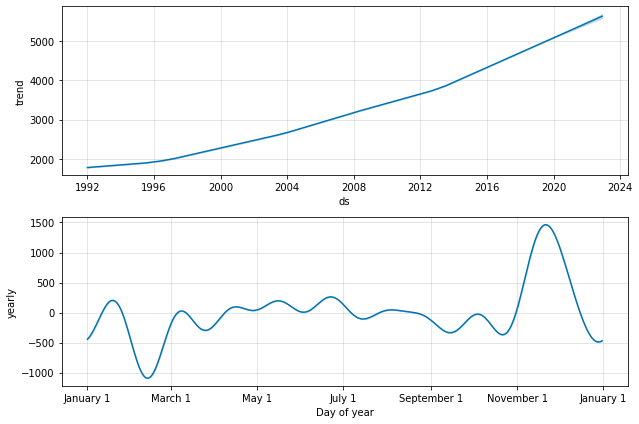

In [56]:
m.plot_components(forecast);